In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [86]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\AMIT\Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [87]:
df.select_dtypes(include=['object']).nunique()

Gender    2
dtype: int64

In [88]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,-1].values

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=50)

In [90]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [91]:
from sklearn.svm import SVC
sv_classfier=SVC(kernel='linear',random_state=0)
sv_classfier.fit(x_train,y_train)


SVC(kernel='linear', random_state=0)

In [92]:
y_pred=sv_classfier.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
parameters=[
    {'C':[1,10,100,3,5],'kernel':['linear']},
    {'C':[1,30,10,7,9],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
]

In [96]:
grid_search=GridSearchCV(estimator=sv_classfier,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

In [99]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002145,0.000529,0.001040,9.805250e-05,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.90625,0.75,...,0.84375,0.90625,0.90625,0.75,0.875,0.90625,0.8125,0.840625,0.066218,46
1,0.004034,0.000546,0.000998,5.223489e-07,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.90625,0.75,...,0.81250,0.90625,0.90625,0.75,0.875,0.90625,0.8125,0.837500,0.066732,47
2,0.013350,0.004078,0.000952,2.694513e-04,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.90625,0.75,...,0.81250,0.90625,0.90625,0.75,0.875,0.90625,0.8125,0.837500,0.066732,47
3,0.003492,0.000705,0.001048,1.512010e-04,3,linear,NaN,"{'C': 3, 'kernel': 'linear'}",0.90625,0.75,...,0.81250,0.90625,0.90625,0.75,0.875,0.90625,0.8125,0.837500,0.066732,47
4,0.003249,0.000553,0.001056,1.499072e-04,5,linear,NaN,"{'C': 5, 'kernel': 'linear'}",0.90625,0.75,...,0.81250,0.90625,0.90625,0.75,0.875,0.90625,0.8125,0.837500,0.066732,47


In [104]:
grid_mean_score = pd.DataFrame(grid_search.cv_results_)[['mean_test_score','std_test_score','params']]
grid_mean_score.head()

,mean_test_score,std_test_score,params
0,0.840625,0.066218,"{'C': 1, 'kernel': 'linear'}"
1,0.837500,0.066732,"{'C': 10, 'kernel': 'linear'}"
2,0.837500,0.066732,"{'C': 100, 'kernel': 'linear'}"
3,0.837500,0.066732,"{'C': 3, 'kernel': 'linear'}"
4,0.837500,0.066732,"{'C': 5, 'kernel': 'linear'}"


In [121]:
accuracy=grid_search.best_score_
print(accuracy)
grid_search.best_params_

0.90625


{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}

In [122]:
grid_mean_scores = grid_search.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.840625 0.8375   0.8375   0.8375   0.8375   0.9      0.89375  0.90625
 0.903125 0.896875 0.896875 0.9      0.896875 0.89375  0.9      0.9
 0.896875 0.9      0.903125 0.9      0.903125 0.903125 0.90625  0.896875
 0.9      0.896875 0.89375  0.890625 0.896875 0.903125 0.903125 0.903125
 0.896875 0.903125 0.896875 0.890625 0.89375  0.89375  0.896875 0.9
 0.896875 0.896875 0.9      0.89375  0.89375  0.890625 0.896875 0.903125
 0.9      0.896875]


Text(0, 0.5, 'cross-validated accuracy')

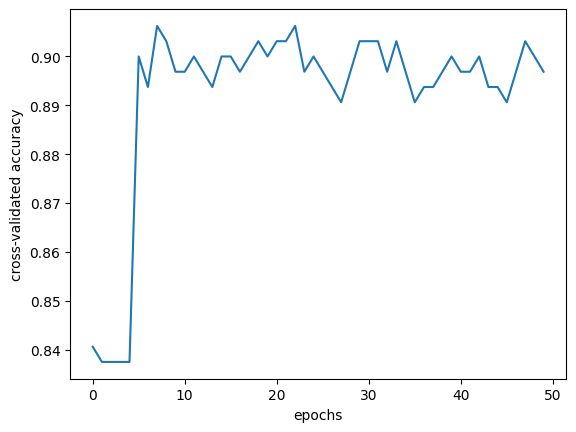

In [123]:
plt.plot(grid_mean_scores)
plt.xlabel('epochs')
plt.ylabel('cross-validated accuracy')